## Statistical Preliminaries

CMP5101 notes (Tevfik Aytekin)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


### mean (expected value)

Let $X$ be a discrete random variable with outcomes $x_1, x_2, ..., x_k$ and with a PMF $f(x_i)$ then the expected value of $X$ is given  by:
$$
E(X) = \mu = \sum_{i=1}^{k}x_if(x_i)
$$

and sample mean is given by:
$$\bar{x} = \frac{\sum_{i=1}^n x_{i}}{n}$$

In [56]:
X = [1, 2, 9, 10]
np.mean(X)

5.5

### variance

Variance indicates the spread of the data. Variance of a random variable X is given by

$$
Var(X)=\sigma^2=\sum_{i=1}^{k}(x_i-E(X))^2f(x_i)
$$


and sample variance is given by:

$$s^2 = \frac{\sum_{i=1}^n (x_{i} - \bar{x} )^2}{n}$$

In [47]:
Y = [4, 5, 6, 7]
np.mean(Y)

5.5

In [48]:
# Even though their mean is the same their variance is quite different.
print(np.var(X))
print(np.var(Y))

16.25
1.25


### standard deviation
Standard deviation is just the square root of variance:
$$
\sigma = \sqrt{\sum_{i=1}^{k}(x_i-E(X))^2f(x_i)}
$$
sample standard deviation:
$$
s = \sqrt{\frac{\sum_{i=1}^n (x_{i} - \bar{x} )^2}{n}}
$$

### covariance
Covariance is a measure indicating how to random variables $X$ and $Y$ vary together. 

$$
Cov(X,Y) = E((X - \mu_X)(Y - \mu_Y))
$$
which can also be written as:
$$
Cov(X,Y) = \sum_{i=1}^k\sum_{j=1}^l(x_i-\mu_X)(y_j-\mu_Y)f(x_i,y_j)
$$

and sample covariance is:

$$
Cov(X,Y) = \frac{\sum_{i=1}^n (x_{i} - \bar{x})(y_{i} - \bar{y})}{n}
$$


In [49]:
print(np.cov(X,Y,bias=True))

[[16.25  4.25]
 [ 4.25  1.25]]


### correlation (Pearson)
Correlation is a scaled version of covariance (between -1 and 1); note that the two parameters always have the same sign (positive, negative, or 0). When the sign is positive, the variables are said to be positively correlated; when the sign is negative, the variables are said to be negatively correlated; and when the sign is 0, the variables are said to be uncorrelated.

$$Cor(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

**Exercise:** Try changing the fourth value of X to 100 and recalculate covariance and correlation.

### Normal distribution

PDF of normal distribution:
$$
f(x; \mu, \sigma^2) = \frac{1}{ \sqrt{2\pi\sigma }}\textrm{exp}\left(\frac{-(x - \mu)^2}{2\sigma ^2 }   \right) 
$$

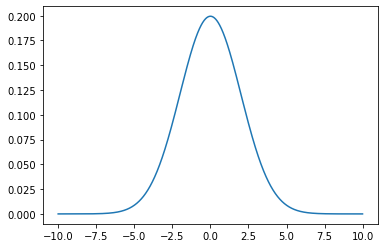

In [55]:
# Plot between -10 and 10 with .01 steps.
x = np.arange(-10, 10, 0.01)
# Mean = 0, Std = 2. You can play wth these parameters.
plt.plot(x, stats.norm.pdf(x,0,2))

In [ ]:
#Generate numbers from a normal distribution
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
y = np.ones(100)
plt.subplots(figsize=(20,4))
plt.scatter(x,y)

In [ ]:
# plot a histogram
plt.hist(x,20);

In [ ]:
# Multivariate (2D) normal distribution where x and y are independent
# You can play with the mean and std values.
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 3, 100)
plt.scatter(x,y)
plt.xlim(-10, 10);
plt.ylim(-10, 10);

In [ ]:
mean = [0.5, -0.2]
cov = [[5, 2], [2, 3]]
x,y = np.random.multivariate_normal(mean,cov,500).T
plt.scatter(x,y); 
plt.xlim(-10, 10);
plt.ylim(-10, 10);

### Distributions and Sampling Distributions

Sampling distribution is the probability distribution of a statistic based on a large number of samples (or as the number of samples goes to infinity) of size $n$ from a given population.

It is possible to show that the mean of the sampling distibution of the mean $\mu_{\bar x} = \mu$ and the std of the sampling distibution of the mean $\sigma_{\bar x} = \frac{\sigma}{\sqrt{n}}$. You check these empirically using the code below.

#### Normal Distribution
Below are examples of normal distributions and sampling distributions from normally distributed populations. You can play with the population mean, population std, and the sample size.

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12,10)

n_samplings = 10000 # If you increase n_samples you will get a smoother histogram

mu = 0; sigma = 4
x = []
for i in range(n_samplings):
    sample = stats.norm.rvs(mu,sigma)
    x.append(sample)
ax[0,0].hist(x,30);
ax[0,0].set_title("Normal Distribution, $\mu = 0, \sigma = 4$")
ax[0,0].set_xlim(-15,15)

mu = 2; sigma = 1
x = []
for i in range(n_samplings):
    sample = stats.norm.rvs(mu,sigma)
    x.append(sample)
ax[0,1].hist(x,30);
ax[0,1].set_title("Normal Distribution, $\mu = 2, \sigma = 1$")
ax[0,1].set_xlim(-15,15)

sample_size = 10  # If you increase sample_size what happens to sample std of the mean?
mu = 0; sigma = 4
x = []
for i in range(n_samplings):
    sample = stats.norm.rvs(mu, sigma, sample_size)
    x.append(sample.mean())
ax[1,0].hist(x,30);
ax[1,0].set_title("Sampling Distribution, $\mu = 0, \sigma = 4, sample\_size=10$")
ax[1,0].set_xlim(-15,15)

mu = 0; sigma = 4
sample_size = 50
x = []
for i in range(n_samplings):
    sample = stats.norm.rvs(mu, sigma, sample_size)
    x.append(sample.mean())
ax[1,1].hist(x,30);
ax[1,1].set_title("Sampling Distribution, $\mu = 0, \sigma = 4, sample\_size=50$")
ax[1,1].set_xlim(-15,15)


Sampling distribution of binomial distribution. 
It can be shown that the mean of a binomial distribution is $np$ and std is $\sqrt{np(1-p)}$

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(12,10)

n = 20  # If you increase sample_size what happens to sample std of the mean?
p = 0.5
sample_size = 10
n_samplings = 10000 # If you increase n_samples you will get a smoother histogram

x = []
for i in range(n_samplings):
    sample = stats.binom.rvs(n,p)
    x.append(sample)
ax[0,0].hist(x,35);
ax[0,0].set_title("Binomial Distribution, n= 20, p=0.5")
ax[0,0].set_xlim(0,20)

p = 0.8
x = []
for i in range(n_samplings):
    sample = stats.binom.rvs(n,p)
    x.append(sample)
ax[0,1].hist(x,35);
ax[0,1].set_title("Binomial Distribution, n= 20, p=0.8")
ax[0,1].set_xlim(0,20)

p = 0.5
x = []
for i in range(n_samplings):
    sample = stats.binom.rvs(n,p, size=sample_size)
    x.append(sample.mean())
ax[1,0].hist(x,35);
ax[1,0].set_title("Sampling Distribution, n = 20, p=0.5, sample_size = 10")
ax[1,0].set_xlim(0,20)

sample_size = 50
p = 0.5
x = []
for i in range(n_samplings):
    sample = stats.binom.rvs(n,p, size=sample_size)
    x.append(sample.mean())
ax[1,1].hist(x,35);
ax[1,1].set_title("Sampling Distribution, n = 20, p=0.5, sample_size = 50")
ax[1,1].set_xlim(0,20)

we have formulas for sampling distribution of the sample mean for normal distribution, don't we have for binomial?

In [ ]:
stats.binom.rvs(n,p, size=sample_size)

### Central Limit Theorem

Given a random variable $X$ with mean $\mu$ and std $\sigma$, the sampling distribution of the mean approaches a normal distribution with mean $\mu$ and std $\frac{\sigma}{\sqrt{N}}$ as the sample size, $N$, increases. This holds true regardless of the distribution of $X$. It is common practice to assume CLT when the sample size is larger than 30.

To test this experimentally, the following histogram shows the sampling distribution of the mean of a sample of size 100 from a population whose $\mu=0$ and std $\sigma=10$. You can test that $\mu_M$ aproaches to 0 and $\sigma_M$ approaches to $\frac{10}{\sqrt{100}} =1$. Actually, in this case since $X$ is normally distributed we even do not need CLT. 

In [ ]:
sample_size = 100
x = []
for i in range(1000):
    sample = stats.norm.rvs(0,10,sample_size)
    x.append(sample.mean())
plt.hist(x,20);

Let see what happens with a non-normal distribution.

In [ ]:
sample_size = 10000
sample = stats.expon.rvs(size=sample_size)
p_mean = sample.mean()
p_std = sample.std()
print("mean:",p_mean,"std:",p_std)
plt.hist(sample,20);

In [ ]:
sample_size = 100
sample_means = []
for i in range(10000):
    sample = stats.expon.rvs(size=sample_size)
    sample_means.append(sample.mean())
s_mean = np.mean(sample_means)
s_std = np.std(sample_means)
clt_std = p_std/np.sqrt(sample_size) 
print("s_mean:",mean,"s_std:",std,"clt_std:",clt_std)
plt.hist(x,100);